In [5]:
from astro_constants import *
from source_info import *
from parameters import *

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import quad
from astropy import units as u
from astropy import constants as const
from scipy.stats import chisquare
from scipy.optimize import curve_fit

In [ ]:
from naima.models import PionDecay, Synchrotron, PowerLaw

In [ ]:


# class PionDecaySED:
#     def __init__(self, particle_distribution, nh=1 * u.cm**-3):
#         """Initialize Pion Decay emission model."""
#         self.model = PionDecay(particle_distribution, nh=nh)

#     def plot(self, ax, spectrum_energy):
#         """Compute and plot the SED."""
#         sed_pion = self.model.sed(spectrum_energy, distance=1 * u.kpc)
#         ax.loglog(spectrum_energy, sed_pion, label="Pion Decay", linewidth=2)


In [7]:
## Initialize the class
coronal_data = Coronal_Description(r_x, l, l_x, mdot, m)

## Calculate parameters for emission region
B_c = coronal_data.coronal_mag_field()
n_c = coronal_data.coronal_density()
T_c = coronal_data.coronal_temperature()
delta_RX = coronal_data.width_current_sheet()
wdot_B = coronal_data.mag_rec_power()

print(f'\nCoronal Magnetic Field:\n B_c = {B_c:.4E} G')
print(f'\nCoronal Particle Number Density:\n n_c = {n_c:.4E} cm-3')
print(f'\nCoronal Temperature:\n T_c = {T_c:.4E} K')
print(f'\nWidth of the current sheet:\n delta_RX = {delta_RX:.4E} cm')
print(f'\nReconnection Power:\n wdot_B = {wdot_B:.4E} erg s-1')


Coronal Magnetic Field:
 B_c = 1.0478E+04 G

Coronal Particle Number Density:
 n_c = 3.4392E+10 cm-3

Coronal Temperature:
 T_c = 2.5282E+09 K

Width of the current sheet:
 delta_RX = 1.6649E+11 cm

Reconnection Power:
 wdot_B = 5.9912E+42 erg s-1


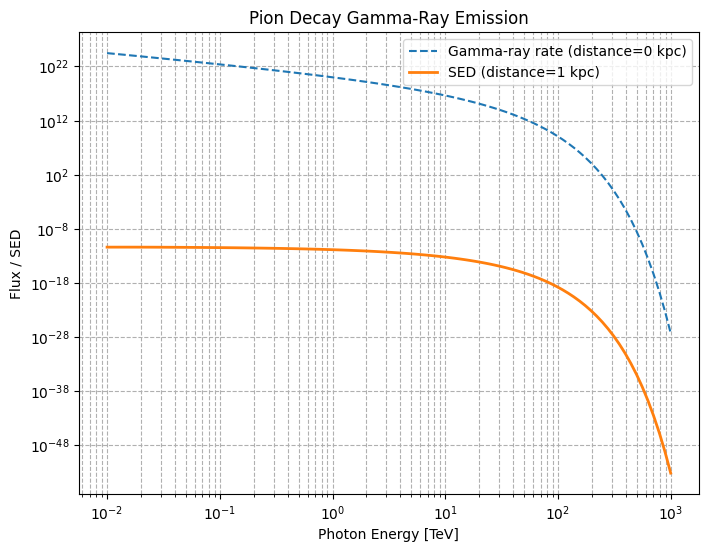

In [11]:
## testing with chat, let's see...

import numpy as np
import astropy.units as u
import naima
from naima.models import PionDecay, ExponentialCutoffPowerLaw
import matplotlib.pyplot as plt

# Define an Exponential Cutoff Power Law (ECPL) for the proton distribution
ECPL = naima.models.ExponentialCutoffPowerLaw(
    1e36 * u.Unit("1/eV"), 1 * u.TeV, 2.1, 13 * u.TeV
)

# Define the target proton number density
nh = 1 * u.cm**-3  # Number density of target protons

# Create the PionDecay model using the ECPL proton distribution
pion_model = PionDecay(ECPL, nh=nh)

# Define photon energy range (from 10 GeV to 1 PeV)
photon_energy = np.logspace(-2, 3, 100) * u.TeV  

# Compute the gamma-ray flux (rate) from pion decay
gamma_rate = pion_model.flux(photon_energy, distance=0 * u.kpc)

# Compute the Spectral Energy Distribution (SED) from pion decay
gamma_sed = pion_model.sed(photon_energy, distance=1 * u.kpc)

# Plot the results
plt.figure(figsize=(8, 6))

# Plot the flux (rate) at distance 0
plt.loglog(photon_energy, gamma_rate, label="Gamma-ray rate (distance=0 kpc)", linestyle="--")

# Plot the SED at distance 1 kpc
plt.loglog(photon_energy, gamma_sed, label="SED (distance=1 kpc)", linewidth=2)

plt.xlabel("Photon Energy [TeV]")
plt.ylabel("Flux / SED")
plt.legend()
plt.grid(which="both", linestyle="--")
plt.title("Pion Decay Gamma-Ray Emission")
plt.show()


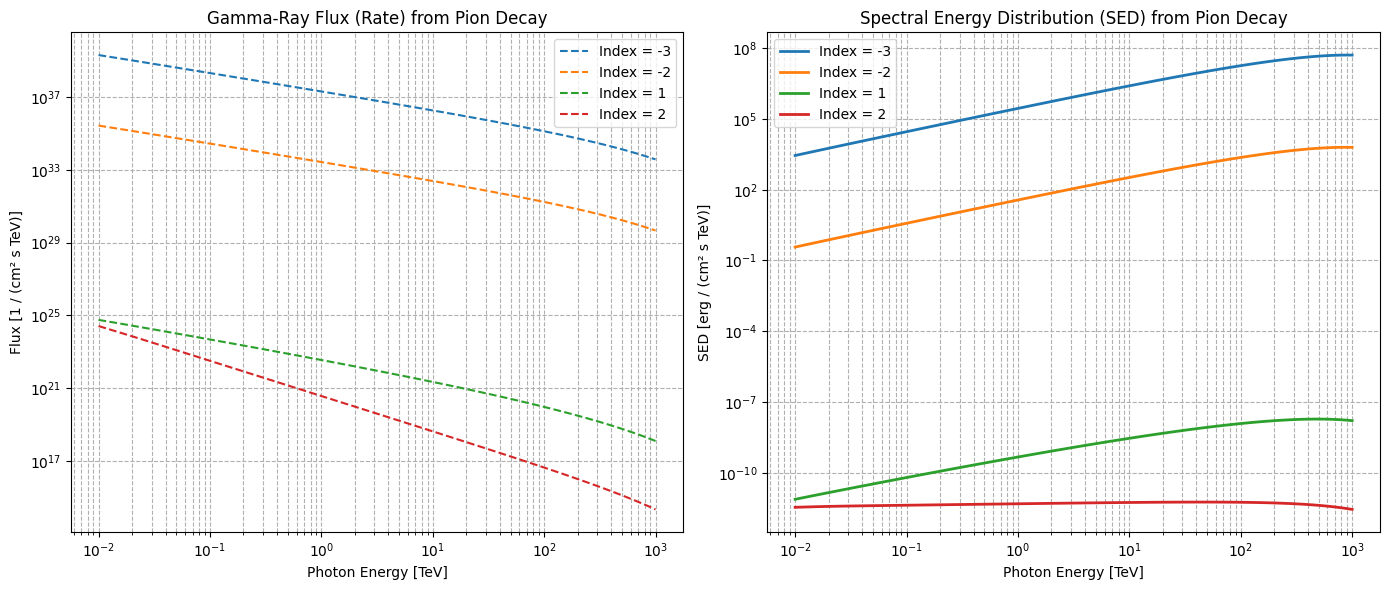

In [14]:
## testing indices with chat

import numpy as np
import astropy.units as u
import naima
from naima.models import PionDecay, PowerLaw
import matplotlib.pyplot as plt

# Define the target proton number density
nh = 1 * u.cm**-3  # Number density of target protons

# Define photon energy range (from 10 GeV to 1 PeV)
photon_energy = np.logspace(-2, 3, 100) * u.TeV

# Set the reference energy and amplitude for the power law
e_0 = 1 * u.TeV  # Reference energy
amplitude = 1e36 * u.Unit("1/eV")  # Amplitude

# Create a list of different power law indices to test
indices = [-3, -2, 1, 2]

# Plot setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Loop through the different indices, creating and plotting each case
for alpha in indices:
    # Create the PowerLaw proton distribution
    power_law_dist = PowerLaw(amplitude, e_0, alpha)
    
    # Create the PionDecay model using the PowerLaw distribution
    pion_model = PionDecay(power_law_dist, nh=nh)
    
    # Compute the gamma-ray flux (rate) from pion decay
    gamma_rate = pion_model.flux(photon_energy, distance=0 * u.kpc)
    
    # Compute the Spectral Energy Distribution (SED) from pion decay
    gamma_sed = pion_model.sed(photon_energy, distance=1 * u.kpc)
    
    # Plot the gamma-ray flux (rate)
    ax1.loglog(photon_energy, gamma_rate, label=f"Index = {alpha}", linestyle="--")
    
    # Plot the Spectral Energy Distribution (SED)
    ax2.loglog(photon_energy, gamma_sed, label=f"Index = {alpha}", linewidth=2)

# Formatting the flux (rate) plot
ax1.set_xlabel("Photon Energy [TeV]")
ax1.set_ylabel("Flux [1 / (cm² s TeV)]")
ax1.set_title("Gamma-Ray Flux (Rate) from Pion Decay")
ax1.legend()
ax1.grid(which="both", linestyle="--")

# Formatting the SED plot
ax2.set_xlabel("Photon Energy [TeV]")
ax2.set_ylabel("SED [erg / (cm² s TeV)]")
ax2.set_title("Spectral Energy Distribution (SED) from Pion Decay")
ax2.legend()
ax2.grid(which="both", linestyle="--")

# Show the plots
plt.tight_layout()
plt.show()
